Praktek TF-IDF

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('movie.csv')

In [3]:
dataset_feature=dataset['lister-item-header'].astype(str)

In [4]:
dataset_feature

0             Stranger Things
1              13 Reasons Why
2     Orange Is the New Black
3                Black Mirror
4                 Money Heist
               ...           
75            F Is for Family
76                  The Ranch
77            American Vandal
78                 Dead to Me
79                  Quicksand
Name: lister-item-header, Length: 80, dtype: object

In [5]:
dataset.shape

(80, 7)

In [6]:
dataset

,lister-item-index,lister-item-header,certificate,runtime,genre,rating,votes
0,1.0,Stranger Things,15,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,2.0,13 Reasons Why,18,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,3.0,Orange Is the New Black,18,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,4.0,Black Mirror,18,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,5.0,Money Heist,15,60 min,"Action, Crime, Drama",8.2,"529,086"
...,...,...,...,...,...,...,...
75,76.0,F Is for Family,15,30 min,"Animation, Comedy, Drama",8.0,"41,074"
76,77.0,The Ranch,15,30 min,"Comedy, Drama, Western",7.5,"42,401"
77,78.0,American Vandal,15,34 min,"Comedy, Crime, Drama",8.1,"32,985"
78,79.0,Dead to Me,15,30 min,"Comedy, Crime, Drama",7.9,"99,440"


In [7]:
dataset_label = dataset['rating']
dataset_label

0     8.7
1     7.5
2     8.0
3     8.7
4     8.2
     ... 
75    8.0
76    7.5
77    8.1
78    7.9
79    7.4
Name: rating, Length: 80, dtype: float64

Cek distribusi label

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\62895\AppData\Local\Temp\ipykernel_25384\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


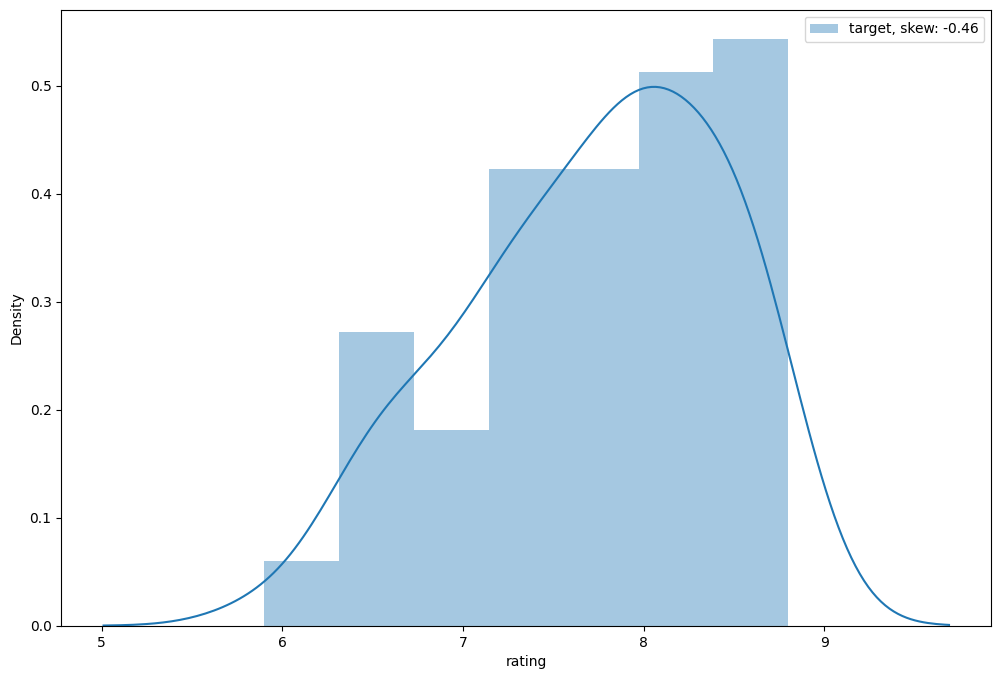

In [9]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [10]:
dataset_label.value_counts()

rating
8.2    7
8.0    6
8.6    5
7.2    5
8.7    4
7.8    4
6.7    4
8.5    4
7.9    4
7.7    4
7.5    4
6.4    3
8.4    3
7.4    3
8.3    2
7.3    2
7.0    2
8.8    2
7.6    2
7.1    2
8.1    2
6.3    1
6.5    1
6.8    1
6.6    1
5.9    1
6.9    1
Name: count, dtype: int64

TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer()

In [13]:
X = vectorizer.fit_transform(dataset_feature)

In [14]:
print(X.shape)

(80, 141)


In [15]:
features = vectorizer.get_feature_names_out()

In [16]:
features

array(['13', 'academy', 'adventures', 'altered', 'american', 'and',
       'arrested', 'at', 'atypical', 'baby', 'between', 'big', 'black',
       'block', 'bojack', 'cable', 'cage', 'carbon', 'cards',
       'castlevania', 'chilling', 'clarita', 'college', 'crown',
       'daredevil', 'dark', 'day', 'dead', 'dear', 'death', 'defenders',
       'development', 'diet', 'disenchantment', 'doll', 'down', 'drag',
       'education', 'elite', 'end', 'events', 'everything', 'family',
       'fist', 'for', 'frankie', 'friends', 'from', 'fuller', 'get',
       'gilmore', 'girlboss', 'girls', 'glow', 'grace', 'greenhouse',
       'grove', 'gypsy', 'haunting', 'heist', 'hemlock', 'hill', 'hookup',
       'horseman', 'house', 'in', 'ing', 'insatiable', 'iron', 'is',
       'jessica', 'jones', 'kimmy', 'kingdom', 'last', 'life', 'lost',
       'love', 'lucifer', 'luke', 'making', 'maniac', 'marco', 'master',
       'me', 'mexico', 'mindhunter', 'mirror', 'money', 'mouth',
       'murderer', 'my', '

In [17]:
idfValues = vectorizer.idf_

In [18]:
d = dict(zip(features, 9 - idfValues))

In [19]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [24]:
for i in range(50):
    print(sortedDict[i])

('the', 6.495922603223725)
('of', 5.551460994382875)
('house', 4.991845206447452)
('academy', 4.704163133995671)
('black', 4.704163133995671)
('girls', 4.704163133995671)
('in', 4.704163133995671)
('is', 4.704163133995671)
('love', 4.704163133995671)
('narcos', 4.704163133995671)
('13', 4.298698025887507)
('adventures', 4.298698025887507)
('altered', 4.298698025887507)
('american', 4.298698025887507)
('and', 4.298698025887507)
('arrested', 4.298698025887507)
('at', 4.298698025887507)
('atypical', 4.298698025887507)
('baby', 4.298698025887507)
('between', 4.298698025887507)
('big', 4.298698025887507)
('block', 4.298698025887507)
('bojack', 4.298698025887507)
('cable', 4.298698025887507)
('cage', 4.298698025887507)
('carbon', 4.298698025887507)
('cards', 4.298698025887507)
('castlevania', 4.298698025887507)
('chilling', 4.298698025887507)
('clarita', 4.298698025887507)
('college', 4.298698025887507)
('crown', 4.298698025887507)
('daredevil', 4.298698025887507)
('dark', 4.298698025887507)

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [26]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="pink", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(20,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

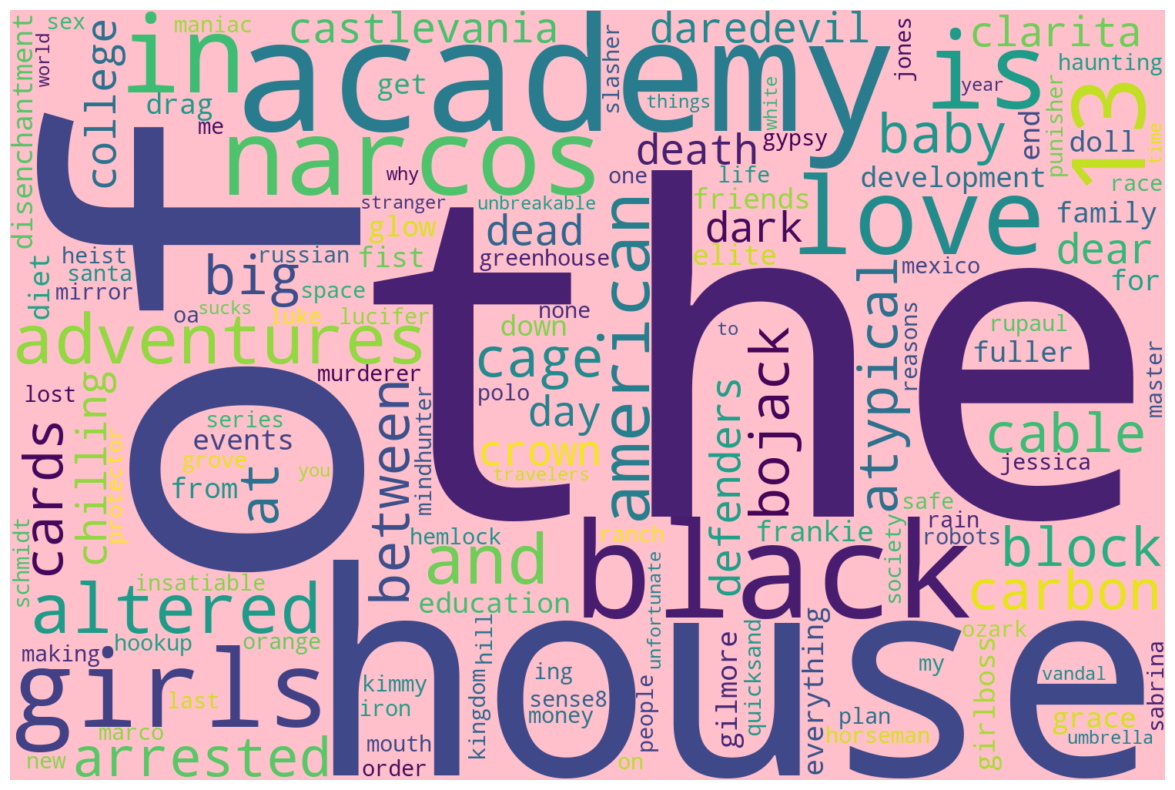

In [27]:
PlotWordCloud(d)